<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/Clustering_K_means_live_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
df=pd.read_csv('/content/gdrive/MyDrive/jadi/Live.csv')
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [27]:
df.shape

(7050, 16)

In [28]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [29]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [30]:
df=df.drop(['Column1', 'Column2', 'Column3','Column4'],axis=1)

In [31]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [32]:
#Find the unique elements of an array
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [33]:
df=df.drop(['status_id','status_published'],axis=1)
df[0:5]

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


<Axes: xlabel='num_comments', ylabel='num_reactions'>

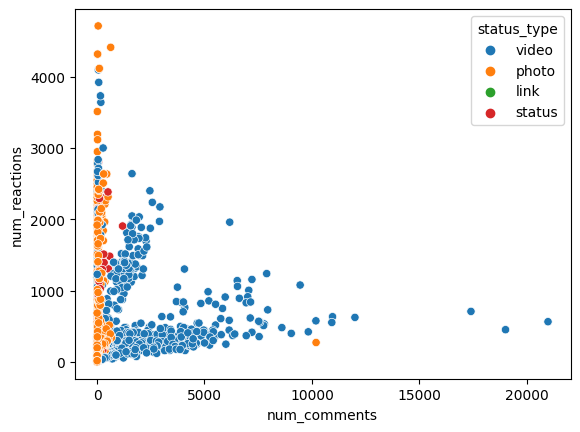

In [38]:
import seaborn as sns
sns.scatterplot(x='num_comments',y='num_reactions',hue='status_type',data=df)

In [34]:
#declare x,y
x=df.drop(['status_type'],axis=1)
y=df['status_type']
x[0:5]
y[0:5]

0    video
1    photo
2    video
3    photo
4    photo
Name: status_type, dtype: object

In [35]:
x[0:5]

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
 3   num_likes      7050 non-null   int64
 4   num_loves      7050 non-null   int64
 5   num_wows       7050 non-null   int64
 6   num_hahas      7050 non-null   int64
 7   num_sads       7050 non-null   int64
 8   num_angrys     7050 non-null   int64
dtypes: int64(9)
memory usage: 495.8 KB


In [37]:
#Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
stand_data=StandardScaler()
x=stand_data.fit_transform(x)

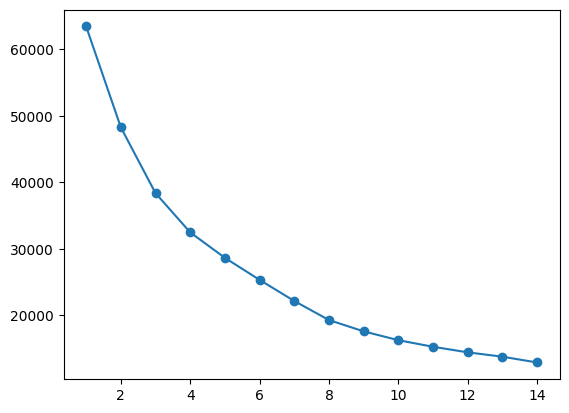

In [40]:
#Kmean elbow
from sklearn.cluster import KMeans
sum_of_squared_distance=[]
K=range(1,15)
for k in K:
  k_mean=KMeans(init="k-means++",n_clusters=k,n_init=12)
  k_mean.fit(x)
  sum_of_squared_distance.append(k_mean.inertia_)
plt.plot(K,sum_of_squared_distance,marker='o')

In [43]:
k_mean=KMeans(init="k-means++",n_clusters=5,n_init=12)
k_mean.fit(x)
label=k_mean.labels_
center=k_mean.cluster_centers_

In [44]:
label

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [45]:
center

array([[ 0.37436179,  0.29696626,  0.08789138,  0.26310714,  0.60870936,
         0.40533946,  0.24023965, 15.68551066,  1.46303952],
       [-0.26003921, -0.1684981 , -0.17826889, -0.24959883, -0.16821432,
        -0.08785912, -0.10332478, -0.08639151, -0.10367125],
       [ 0.68227453,  2.90465669,  2.77744425,  0.46158314,  2.45889524,
         0.29145889,  1.22984766,  0.78835984,  1.64880202],
       [ 3.44405643, -0.18325934, -0.21564903,  3.56552625, -0.24077535,
         0.13145062, -0.12573702, -0.13238837, -0.14835034],
       [ 2.76060325,  1.67135725,  5.40916643,  1.91514739,  7.04917503,
        11.74877116,  7.26017042,  1.06177877,  2.3043185 ]])